# Clean

In [2]:
import pandas as pd

perturb_list = ["base", "perturb1", "perturb2"]
for perturb in perturb_list:
    file_path = f'model_coef/{perturb}_coef.csv'
    df = pd.read_csv(file_path)

    # delete column
    df = df.iloc[:, 1:-2]

    new_columns = ['a1', 'd', 'g', 'u']
    data = {col: [] for col in new_columns}
    for i in range(0, len(df.columns), 4):
        for col, new_col in zip(df.columns[i:i+4], new_columns):
            data[new_col].append(df[col].values[0])

    new_df = pd.DataFrame(data)
    new_df.to_csv(f'model_coef/{perturb}_coef_clean.csv', index=False)

# Visualize

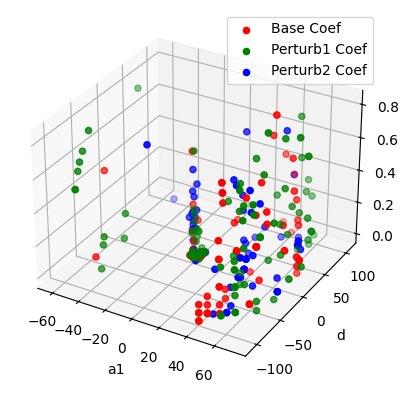

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

base_coef = pd.read_csv('model_coef/base_coef_clean.csv', usecols=[0, 1, 2])
perturb1_coef = pd.read_csv('model_coef/perturb1_coef_clean.csv', usecols=[0, 1, 2])
perturb2_coef = pd.read_csv('model_coef/perturb2_coef_clean.csv', usecols=[0, 1, 2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(base_coef.iloc[:, 0], base_coef.iloc[:, 1], base_coef.iloc[:, 2], c='r', label='Base Coef')
ax.scatter(perturb1_coef.iloc[:, 0], perturb1_coef.iloc[:, 1], perturb1_coef.iloc[:, 2], c='g', label='Perturb1 Coef')
ax.scatter(perturb2_coef.iloc[:, 0], perturb2_coef.iloc[:, 1], perturb2_coef.iloc[:, 2], c='b', label='Perturb2 Coef')

ax.set_xlabel('a1')
ax.set_ylabel('d')
ax.set_zlabel('g')
ax.legend()

plt.show()